In [13]:
import bmcmc ###only for python2
import numpy as np
import scipy.stats

In [2]:
class stlineb(bmcmc.Model):
  def set_descr(self):
      # setup descriptor
      self.descr['m']      =['l0', 1.0, 0.2,'$m$',        -1e10,1e10]
      self.descr['c']      =['l0',10.0, 1.0,'$c$',        -1e10,1e10]
      self.descr['mu_b']   =['l0', 1.0, 1.0,'$\mu_b$',    -1e10,1e10]
      self.descr['sigma_b']=['l0', 1.0, 1.0,'$\sigma_b$', 1e-10,1e10]
      self.descr['p_b']    =['l0',0.1,0.01,'$P_b$',      1e-10,0.999]

  def set_args(self):
      # setup data points
      np.random.seed(11)
      self.args['x']=0.5+np.random.ranf(self.eargs['dsize'])*9.5
      self.args['sigma_y']=0.25+np.random.ranf(self.eargs['dsize'])
      self.args['y']=np.random.normal(self.args['x']*2+10,self.args['sigma_y'])
      # add outliers
      self.ind=np.array([0,2,4,6,8,10,12,14,16,18])
      self.args['y'][self.ind]=np.random.normal(30,5,self.ind.size)
      self.args['y'][self.ind]=self.args['y'][self.ind]+np.random.normal(0.0,self.args['sigma_y'][self.ind])

  def lnfunc(self,args):
      # log posterior
      if self.eargs['outliers'] == False:
          temp1=(args['y']-(self.args['m']*self.args['x']+self.args['c']))/args['sigma_y']
          return -0.5*(temp1*temp1)-np.log(np.sqrt(2*np.pi)*args['sigma_y'])
      else:
          temp11=scipy.stats.norm.pdf(args['y'],loc=(self.args['m']*self.args['x']+self.args['c']),scale=args['sigma_y'])
          sigma_b=np.sqrt(np.square(args['sigma_y'])+np.square(args['sigma_b']))
          temp22=scipy.stats.norm.pdf(args['y'],loc=self.args['mu_b'],scale=sigma_b)
          return np.log((1-args['p_b'])*temp11+args['p_b']*temp22)

  def myplot(self,chain):
     # optional method for plotting
     # plot best fit line corrsponding to chain of this model
      plt.clf()
      x = np.linspace(0,10)
      burn=self.chain['m'].size/2
      vals=self.best_fit(burn=burn)
      plt.errorbar(self.args['x'], self.args['y'], yerr=self.args['sigma_y'], fmt=".k")
      plt.errorbar(self.args['x'][self.ind], self.args['y'][self.ind], yerr=self.args['sigma_y'][self.ind], fmt=".r")
      plt.plot(x,vals[0]*x+vals[1], color="g", lw=2, alpha=0.5)
      for i,key in enumerate(self.names0):
          print key
          plt.text(0.5,0.3-i*0.06,self.descr[key][3]+'='+bmcmc.stat_text(self.chain[key][burn:]),transform=plt.gca().transAxes)

     # plot best fit line corrsponding to some other chain
      vals1=[]
      burn1=chain['m'].size/2
      for i,key in enumerate(['m','c']):
          print key
          plt.text(0.05,0.5-i*0.05,self.descr[key][3]+'='+bmcmc.stat_text(chain[key][burn1:]),transform=plt.gca().transAxes)
          vals1.append(np.mean(chain[key][burn1:]))
      plt.plot(x,vals1[0]*x+vals1[1], 'g--', lw=2, alpha=0.5)
      plt.xlabel(r'$x$')
      plt.ylabel(r'$y$')
      plt.axis([0,10,5,40,])

In [5]:
model1=stlineb(eargs={'dsize':50})

In [6]:
model1.eargs['outliers']=False

In [7]:
model1.sample(['m','c'],10000)

MH         1000  0.352  0.398  0.383  1.303 [0.00221772 0.0703153 ]
               m      1.10021      0.15126
               c      17.1328      1.04052
MH         2000  0.352  0.367  0.337  1.137 [0.00306782 0.10510783]
               m      1.08121     0.110596
               c      17.2804     0.758784
MH         3000  0.352  0.359  0.333  1.075 [0.00240531 0.06481975]
               m      1.07562     0.092369
               c      17.3279     0.629936
MH         4000  0.352  0.357  0.348  1.150 [0.00257518 0.06858218]
               m       1.0724    0.0813558
               c      17.3506     0.552219
MH         5000  0.352  0.354  0.347  1.084 [0.00228264 0.06796132]
               m      1.06934    0.0741274
               c      17.3682     0.499536
MH         6000  0.352  0.356  0.352  1.145 [0.00235326 0.07433164]
               m      1.06794    0.0687161
               c      17.3795     0.461182
MH         7000  0.352  0.357  0.357  1.175 [0.00233016 0.07509257]
        

In [8]:
chain1=model1.chain

In [9]:
model1.eargs['outliers']=True

In [14]:
model1.sample(['m','c','p_b','mu_b','sigma_b'],20000)

/Users/brettlv/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log
/Users/brettlv/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in log


MH         1000  0.275  0.288  0.295  0.520 [2.14981052e-03 7.09846426e-02 2.07241774e-03 2.18663035e+02
 2.94267629e+02]
               m      2.01977      0.13824
               c      9.71724     0.560225
             p_b    0.0921327    0.0515815
            mu_b     -16.7994      17.3135
         sigma_b      27.9602      19.9136
MH         2000  0.275  0.226  0.164 -0.451 [1.62066461e-03 3.20802667e-02 2.73126518e-03 8.84833696e+00
 5.42154453e+00]
               m      1.99016     0.106795
               c      9.89873     0.454876
             p_b     0.105359    0.0508553
            mu_b     -2.65898      27.5457
         sigma_b      22.7245      21.4404
MH         3000  0.275  0.263  0.274 -0.108 [1.10548686e-03 2.61605642e-02 2.02569691e-03 2.32941729e+00
 1.16271401e+00]
               m      1.99833    0.0900638
               c      9.89748     0.386866
             p_b      0.13451    0.0639831
            mu_b      8.26073      27.3064
         sigma_b      16.7672   

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

m
c
p_b
mu_b
sigma_b
m
c


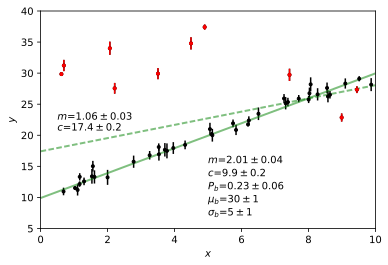

In [21]:
model1.myplot(chain1)